# Drug Use Prediction

## Introduction

In this project, we explore the classification of drug consumption patterns using machine learning algorithms, specifically focusing on decision trees and random forests. The dataset utilized in this analysis originates from the UCI Machine Learning Repository and contains various features related to drug consumption behaviors.

The primary goal of this project is to predict whether individuals consume specific drugs (e.g., chocolate and mushrooms) based on a set of demographic and behavioral features. We will first apply a decision tree classifier to visualize the decision-making process and evaluate its accuracy. Subsequently, we will enhance our model using a random forest classifier, which aggregates multiple decision trees to improve classification performance.

This analysis aims to demonstrate the effectiveness of these machine learning techniques in handling classification tasks and to provide insights into the underlying patterns of drug consumption behaviors.

To start the vritual enviornment, runsource sklearn-env/bin/activate

## Libraries Installed

In [450]:
import ssl
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import sys
print(sys.executable)
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score

/Users/jhaha/Documents/GitHub/Drug-Use-Prediction/sklearn-env/bin/python


## Data Preprocessing

In [451]:
# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

# Fetch dataset
drug_consumption_quantified = fetch_ucirepo(id=373)

# Data as pandas DataFrames
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets

# Convert features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

user_data = df.iloc[:, 0:12]


choco = df['choc']
shrooms = df['mushrooms']


In [452]:
# take the multiple classifications and convert it into binary

choc_binary = []
mushrooms_binary = []

for i in choco:
    if i == 'CL0' or i == 'CL1':
        choc_binary.append(0)
    else:
        choc_binary.append(1)

for i in shrooms:
    if i == 'CL0' or i == 'CL1':
        mushrooms_binary.append(0)
    else:
        mushrooms_binary.append(1)

choc_binary = np.array(choc_binary)
mushrooms_binary = np.array(mushrooms_binary)
# print("X:")
# print(user_data.shape)
# print("Y:")
# print(choc_binary.shape)

X_choco_train, X_choco_test, y_choco_train, y_choco_test = train_test_split(user_data, choc_binary, test_size=0.33, random_state=42, stratify=choc_binary)
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(user_data, mushrooms_binary, test_size=0.33, random_state=42, stratify=mushrooms_binary)

# print("X choco train")
# print(X_choco_train.shape)
# print("Y choco train")
# print(y_choco_train.shape)
# print("X choco test")
# print(X_choco_test.shape)
# print("Y choco test")
# print(y_choco_test.shape)

In [453]:
# model eval function
def evaluate_model(type, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f"{model.__class__.__name__} - Precision: {precision}, Recall: {recall}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots()
    disp.plot(ax=ax)
    ax.set_title(f"{type} Confusion Matrix for {model.__class__.__name__}")
    plt.show()
    
    return y_pred

## Model Training and Fitting for Chocolate



DecisionTreeClassifier - Precision: 0.9802955665024631, Recall: 0.9770867430441899


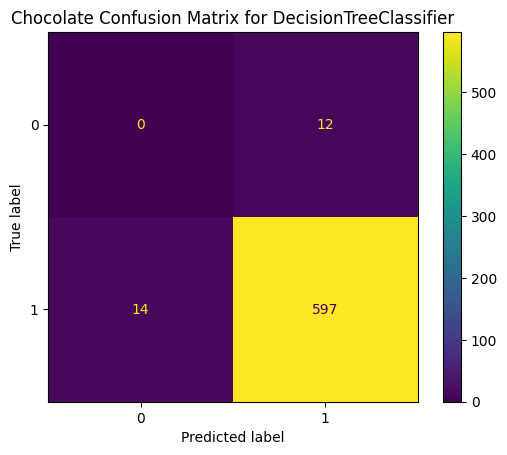

RandomForestClassifier - Precision: 0.9807383627608347, Recall: 1.0


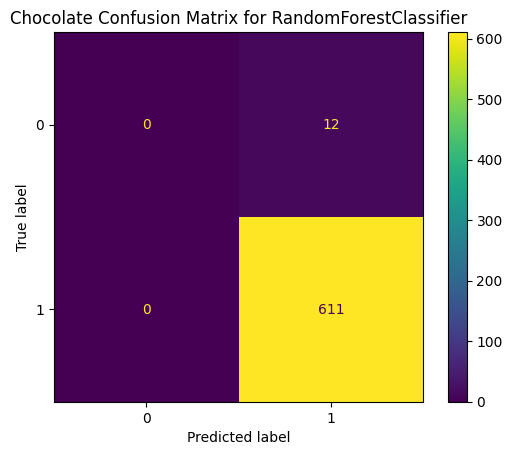

SVC - Precision: 0.9807383627608347, Recall: 1.0


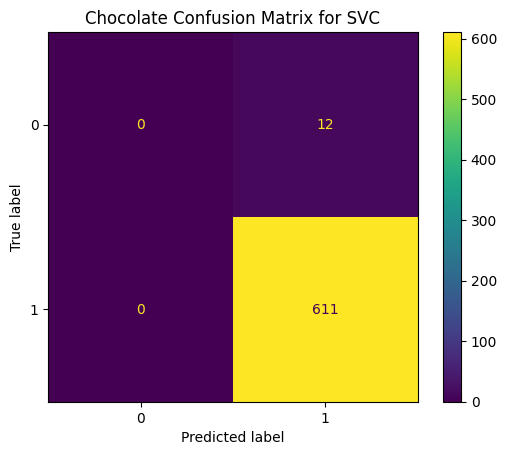

GradientBoostingClassifier - Precision: 0.9807383627608347, Recall: 1.0


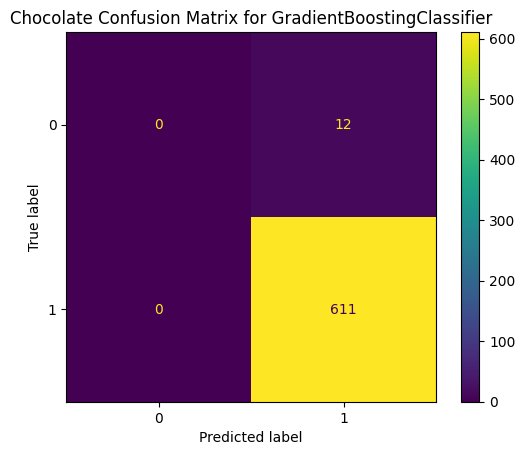

MLPClassifier - Precision: 0.9806451612903225, Recall: 0.9950900163666121


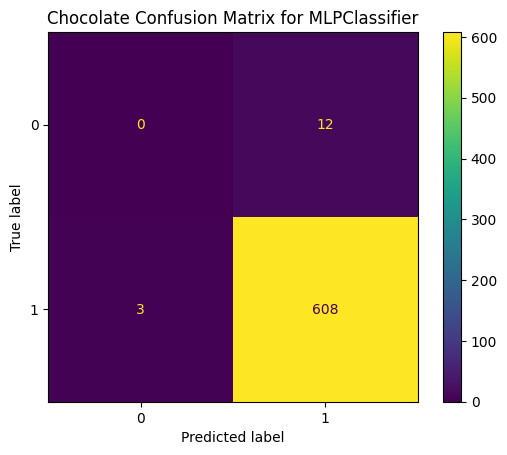

KNeighborsClassifier - Precision: 0.9822866344605475, Recall: 0.9983633387888707


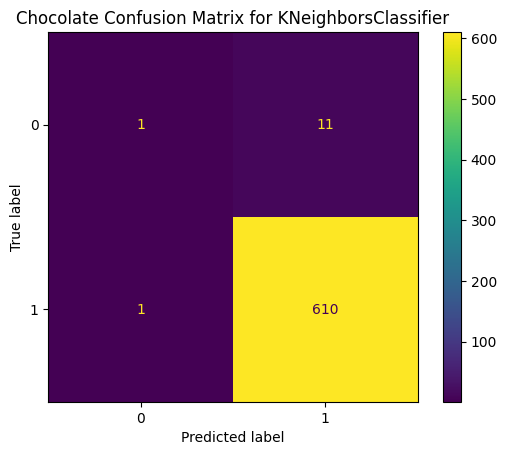

In [454]:
# Single Decision Tree
choco_tree = tree.DecisionTreeClassifier(random_state=42)
y_tree_choco_pred = evaluate_model("Chocolate", choco_tree, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Random Forest Learner
choco_random_forest = RandomForestClassifier(random_state=42)
y_random_forest_choco_pred = evaluate_model("Chocolate", choco_random_forest, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# SVM (Support Vector Machine)
choco_svm = svm.SVC(random_state=42, probability=True)
y_svm_choco_pred = evaluate_model("Chocolate", choco_svm, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Gradient Boosting Ensemble
choco_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_gb_choco_pred = evaluate_model("Chocolate", choco_gb, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Multi-Layer Perceptron
choco_mlp = MLPClassifier(random_state=1, max_iter=500)
y_mlp_choco_pred = evaluate_model("Chocolate", choco_mlp, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# K-Nearest Neighbors
choco_knn = KNeighborsClassifier(n_neighbors=3)
y_knn_choco_pred = evaluate_model("Chocolate", choco_knn, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


## ROC Curves for Chocolate

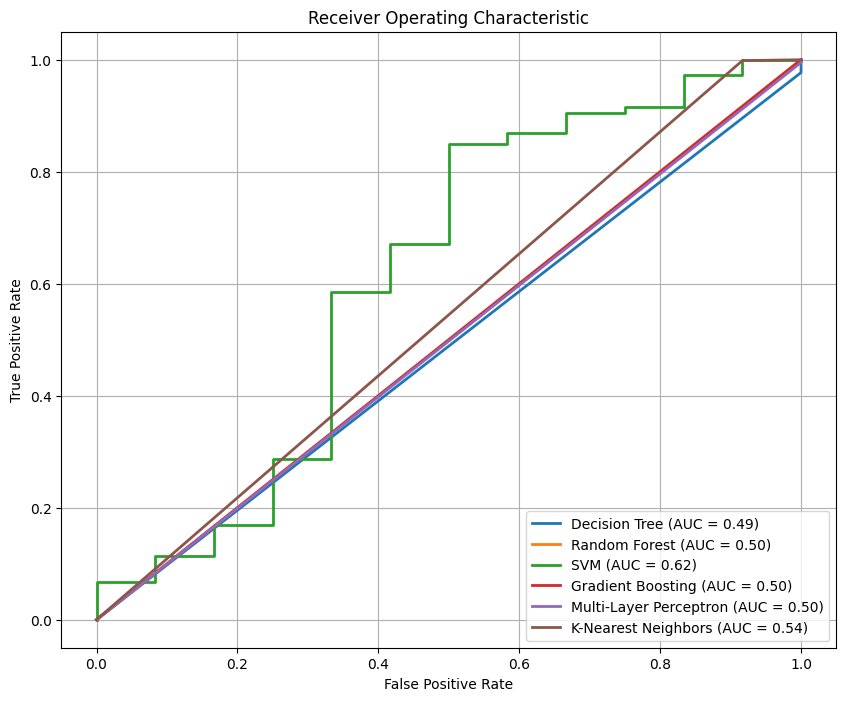

In [455]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_choco_pred,
    "Random Forest": y_random_forest_choco_pred,
    "SVM": y_svm_choco_pred,
    "Gradient Boosting": y_gb_choco_pred,
    "Multi-Layer Perceptron": y_mlp_choco_pred,
    "K-Nearest Neighbors": y_knn_choco_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = choco_svm.predict_proba(X_choco_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_choco_test, y_pred_proba)
    roc_auc = roc_auc_score(y_choco_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Model Training and Fitting for Mushrooms



DecisionTreeClassifier - Precision: 0.5697674418604651, Recall: 0.6419213973799127


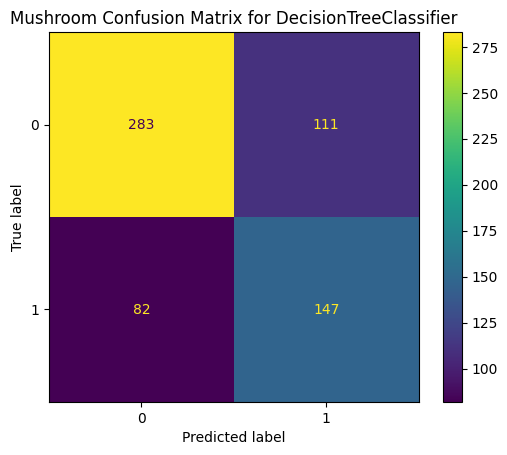

RandomForestClassifier - Precision: 0.6379310344827587, Recall: 0.6462882096069869


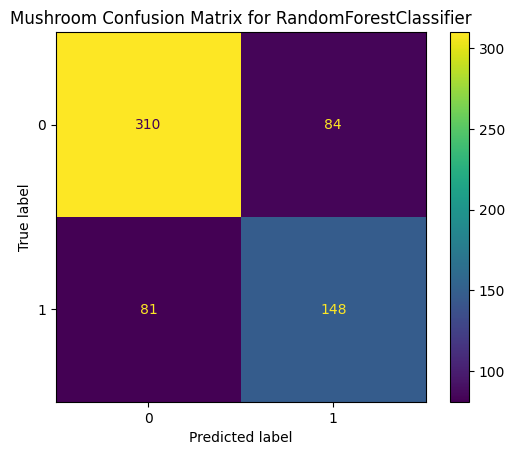

SVC - Precision: 0.648068669527897, Recall: 0.6593886462882096


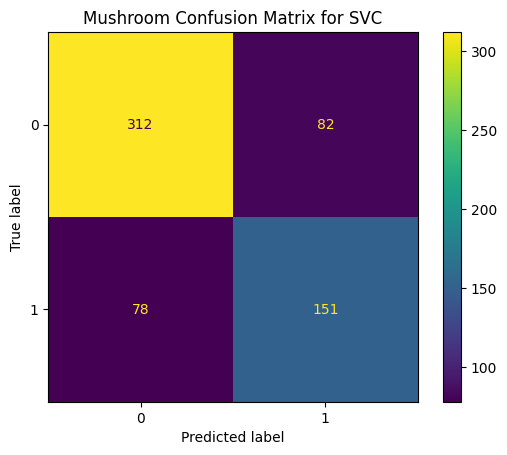

GradientBoostingClassifier - Precision: 0.6348547717842323, Recall: 0.6681222707423581


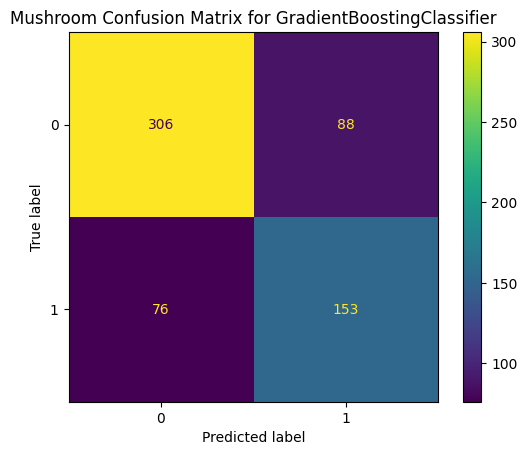

MLPClassifier - Precision: 0.6234817813765182, Recall: 0.6724890829694323


/Users/jhaha/Documents/GitHub/Drug-Use-Prediction/sklearn-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


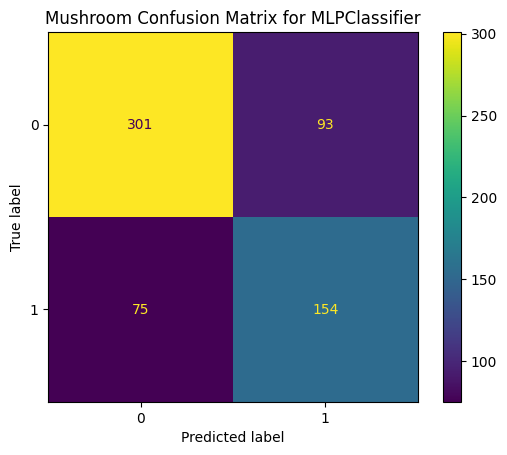

KNeighborsClassifier - Precision: 0.5811965811965812, Recall: 0.5938864628820961


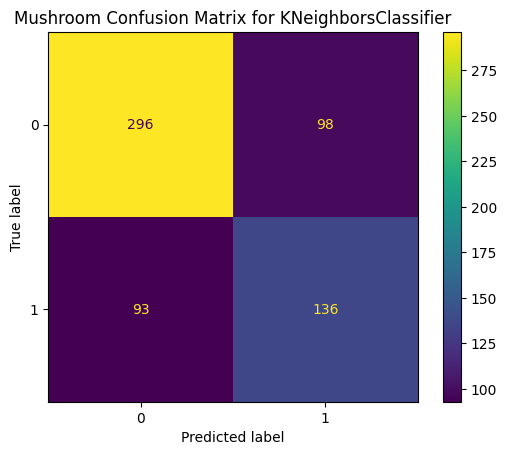

In [456]:
# Single Decision Tree
mushroom_tree = tree.DecisionTreeClassifier(random_state=42)
y_tree_mushroom_pred = evaluate_model("Mushroom", mushroom_tree, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Random Forest Learner
mushroom_random_forest = RandomForestClassifier(random_state=42)
y_random_forest_mushroom_pred = evaluate_model("Mushroom", mushroom_random_forest, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# SVM (Support Vector Machine)
mushroom_svm = svm.SVC(random_state=42, probability=True)
y_svm_mushroom_pred = evaluate_model("Mushroom", mushroom_svm, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Gradient Boosting Ensemble
mushroom_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_gb_mushroom_pred = evaluate_model("Mushroom", mushroom_gb, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Multi-Layer Perceptron
mushroom_mlp = MLPClassifier(random_state=1, max_iter=500)
y_mlp_mushroom_pred = evaluate_model("Mushroom", mushroom_mlp, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# K-Nearest Neighbors
mushroom_knn = KNeighborsClassifier(n_neighbors=3)
y_knn_mushroom_pred = evaluate_model("Mushroom", mushroom_knn, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

## ROC Curves for Mushrooms

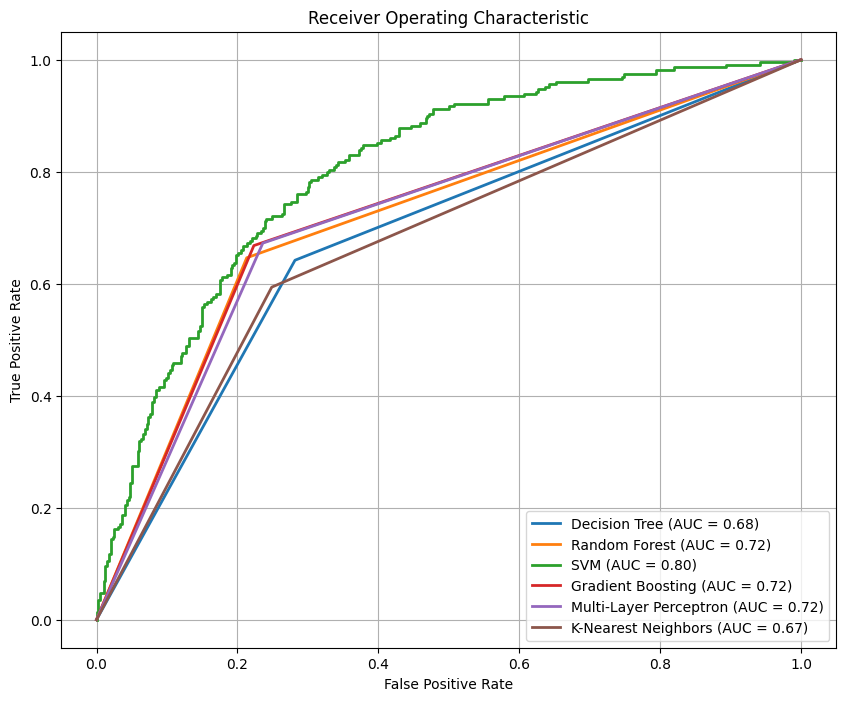

In [457]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_mushroom_pred,
    "Random Forest": y_random_forest_mushroom_pred,
    "SVM": y_svm_mushroom_pred,
    "Gradient Boosting": y_gb_mushroom_pred,
    "Multi-Layer Perceptron": y_mlp_mushroom_pred,
    "K-Nearest Neighbors": y_knn_mushroom_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = mushroom_svm.predict_proba(X_mushroom_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_mushroom_test, y_pred_proba)
    roc_auc = roc_auc_score(y_mushroom_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Class Balancing for Chocolate

### Undersampling Chocolates Dataset via Tomek Links

In [458]:
X_choco_train, X_choco_test, y_choco_train, y_choco_test = train_test_split(
    user_data, choc_binary, test_size=0.33, random_state=42, stratify=choc_binary
)

print("Original class distribution (train):", pd.Series(y_choco_train).value_counts())
print("Original class distribution (test):", pd.Series(y_choco_test).value_counts())

tl = TomekLinks(sampling_strategy='majority', n_jobs=-1)
X_res, y_res = tl.fit_resample(X_choco_train, y_choco_train)

X_choco_train, y_choco_train = X_res, y_res

print("Resampled class distribution (after Tomek Links):", pd.Series(y_res).value_counts())

Original class distribution (train): 1    1239
0      23
Name: count, dtype: int64
Original class distribution (test): 1    611
0     12
Name: count, dtype: int64
Resampled class distribution (after Tomek Links): 1    1232
0      23
Name: count, dtype: int64


## Model Training and Fitting for Undersampled Chocolate Dataset



DecisionTreeClassifier - Precision: 0.9802306425041186, Recall: 0.9738134206219312


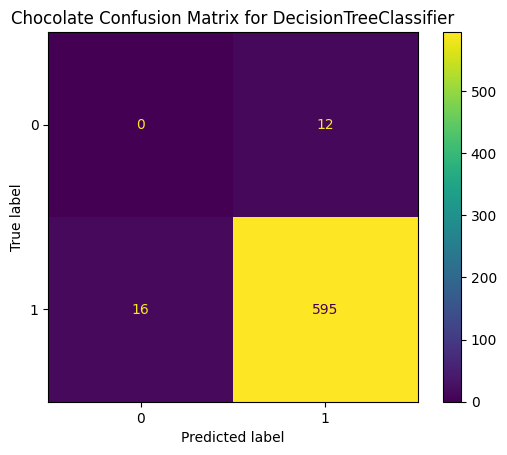

RandomForestClassifier - Precision: 0.9807383627608347, Recall: 1.0


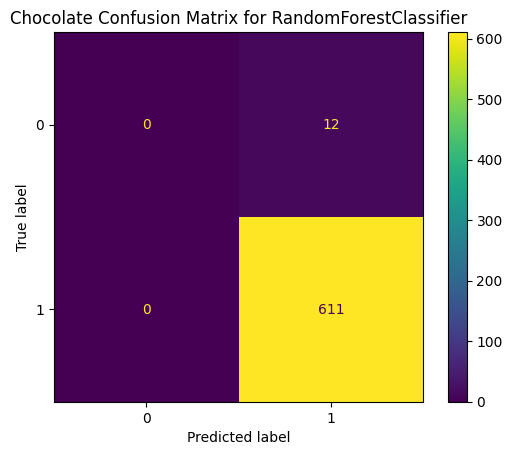

SVC - Precision: 0.9807383627608347, Recall: 1.0


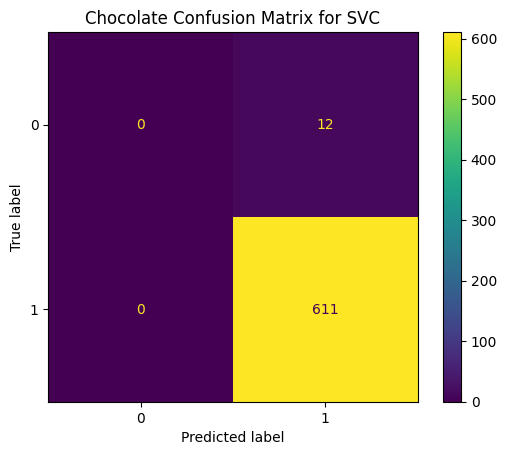

GradientBoostingClassifier - Precision: 0.9807383627608347, Recall: 1.0


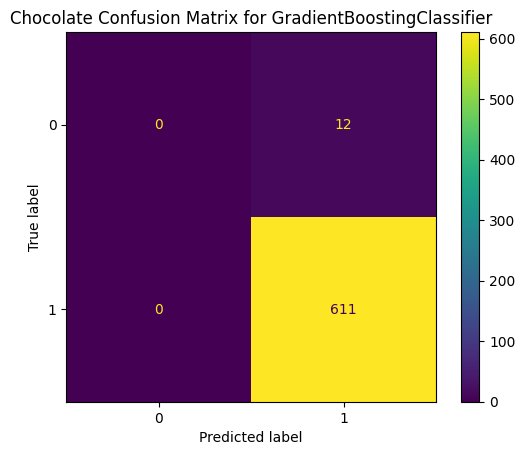

MLPClassifier - Precision: 0.9806138933764136, Recall: 0.9934533551554828


/Users/jhaha/Documents/GitHub/Drug-Use-Prediction/sklearn-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


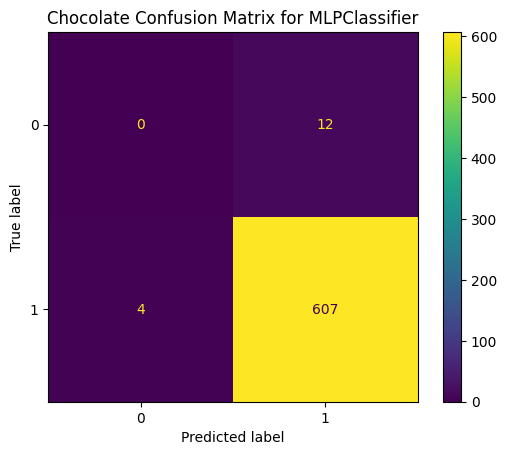

KNeighborsClassifier - Precision: 0.9822866344605475, Recall: 0.9983633387888707


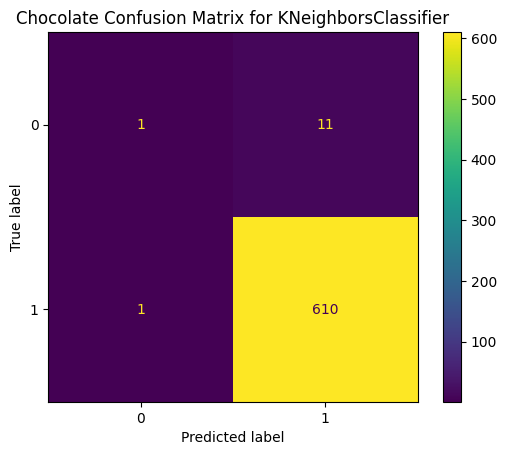

In [459]:
# Single Decision Tree
choco_tree = tree.DecisionTreeClassifier(random_state=42)
y_tree_choco_pred = evaluate_model("Chocolate", choco_tree, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Random Forest Learner
choco_random_forest = RandomForestClassifier(random_state=42)
y_random_forest_choco_pred = evaluate_model("Chocolate", choco_random_forest, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# SVM (Support Vector Machine)
choco_svm = svm.SVC(random_state=42, probability=True)
y_svm_choco_pred = evaluate_model("Chocolate", choco_svm, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Gradient Boosting Ensemble
choco_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_gb_choco_pred = evaluate_model("Chocolate", choco_gb, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Multi-Layer Perceptron
choco_mlp = MLPClassifier(random_state=1, max_iter=500)
y_mlp_choco_pred = evaluate_model("Chocolate", choco_mlp, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# K-Nearest Neighbors
choco_knn = KNeighborsClassifier(n_neighbors=3)
y_knn_choco_pred = evaluate_model("Chocolate", choco_knn, X_choco_train, y_choco_train, X_choco_test, y_choco_test)

## ROC Curves for Undersampled Chocolate

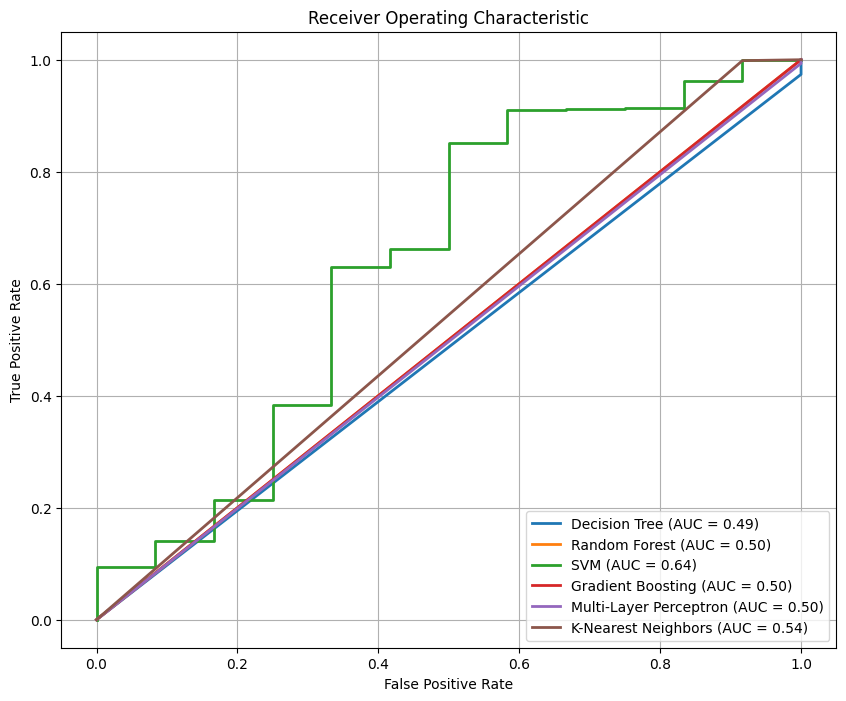

In [460]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_choco_pred,
    "Random Forest": y_random_forest_choco_pred,
    "SVM": y_svm_choco_pred,
    "Gradient Boosting": y_gb_choco_pred,
    "Multi-Layer Perceptron": y_mlp_choco_pred,
    "K-Nearest Neighbors": y_knn_choco_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = choco_svm.predict_proba(X_choco_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_choco_test, y_pred_proba)
    roc_auc = roc_auc_score(y_choco_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Oversampling Chocolates Dataset via SMOTE

In [461]:
X_choco_train, X_choco_test, y_choco_train, y_choco_test = train_test_split(
    user_data, choc_binary, test_size=0.33, random_state=42, stratify=choc_binary
)

# Print the original dataset shapes
print('Original dataset shape (train) %s' % pd.Series(y_choco_train).value_counts())
print('Original dataset shape (test) %s' % pd.Series(y_choco_test).value_counts())

# Apply SMOTE only to the training set
sm = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X_choco_train, y_choco_train)

X_choco_train, y_choco_train = X_res, y_res

# Print the resampled dataset shape
print('Resampled dataset shape %s' % pd.Series(y_res).value_counts())

Original dataset shape (train) 1    1239
0      23
Name: count, dtype: int64
Original dataset shape (test) 1    611
0     12
Name: count, dtype: int64
Resampled dataset shape 1    1239
0    1239
Name: count, dtype: int64


## Model Training and Fitting for Oversampled Chocolate Dataset



DecisionTreeClassifier - Precision: 0.9817880794701986, Recall: 0.9705400981996727


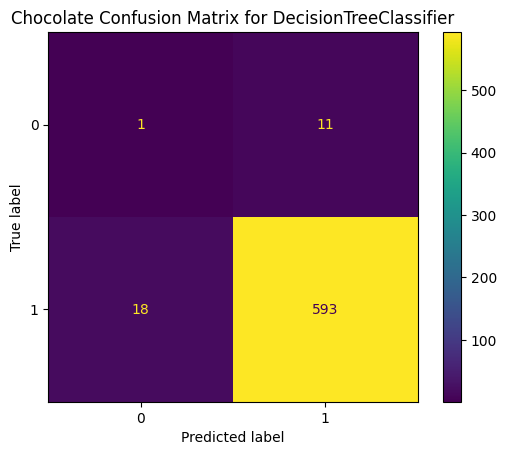

RandomForestClassifier - Precision: 0.9807073954983923, Recall: 0.9983633387888707


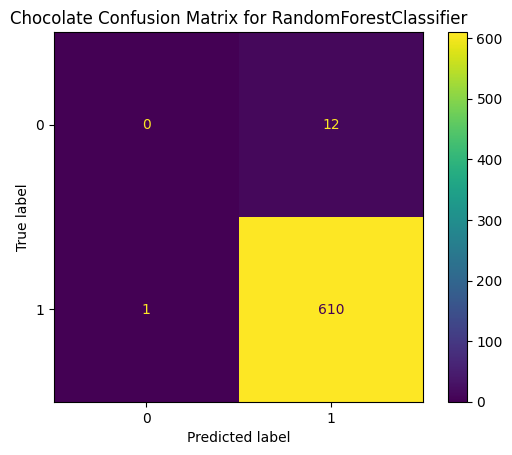

SVC - Precision: 0.9830508474576272, Recall: 0.9492635024549918


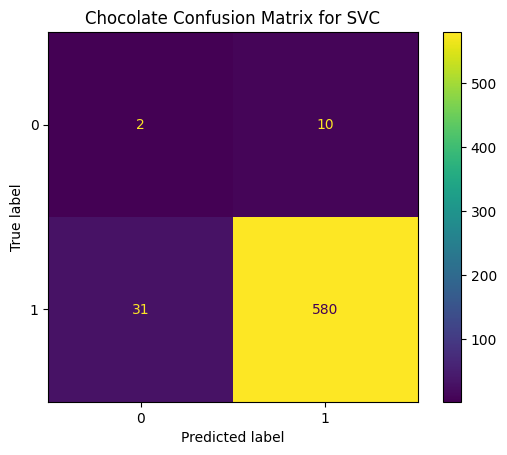

GradientBoostingClassifier - Precision: 0.9801980198019802, Recall: 0.972176759410802


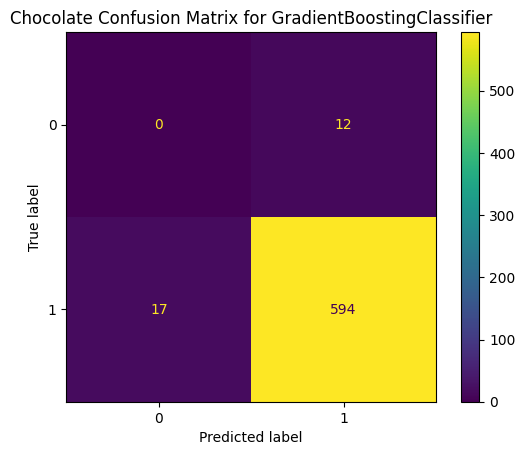

MLPClassifier - Precision: 0.9802306425041186, Recall: 0.9738134206219312


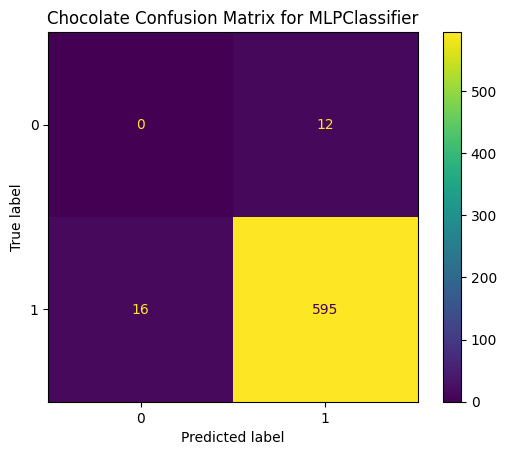

KNeighborsClassifier - Precision: 0.9868421052631579, Recall: 0.8592471358428805


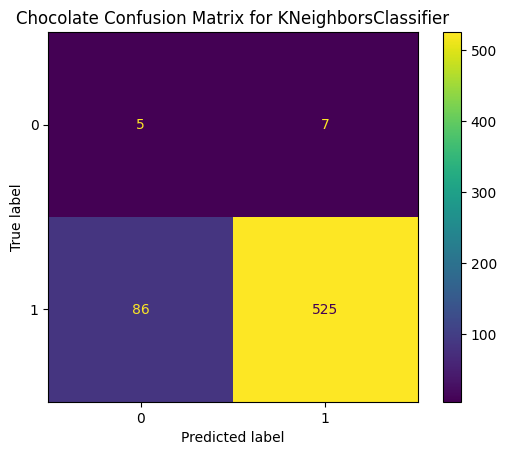

In [462]:
# Single Decision Tree
choco_tree = tree.DecisionTreeClassifier(random_state=42)
y_tree_choco_pred = evaluate_model("Chocolate", choco_tree, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Random Forest Learner
choco_random_forest = RandomForestClassifier(random_state=42)
y_random_forest_choco_pred = evaluate_model("Chocolate", choco_random_forest, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# SVM (Support Vector Machine)
choco_svm = svm.SVC(random_state=42, probability=True)
y_svm_choco_pred = evaluate_model("Chocolate", choco_svm, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Gradient Boosting Ensemble
choco_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_gb_choco_pred = evaluate_model("Chocolate", choco_gb, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Multi-Layer Perceptron
choco_mlp = MLPClassifier(random_state=1, max_iter=500)
y_mlp_choco_pred = evaluate_model("Chocolate", choco_mlp, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# K-Nearest Neighbors
choco_knn = KNeighborsClassifier(n_neighbors=3)
y_knn_choco_pred = evaluate_model("Chocolate", choco_knn, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


## ROC Curves for Oversampled Chocolate

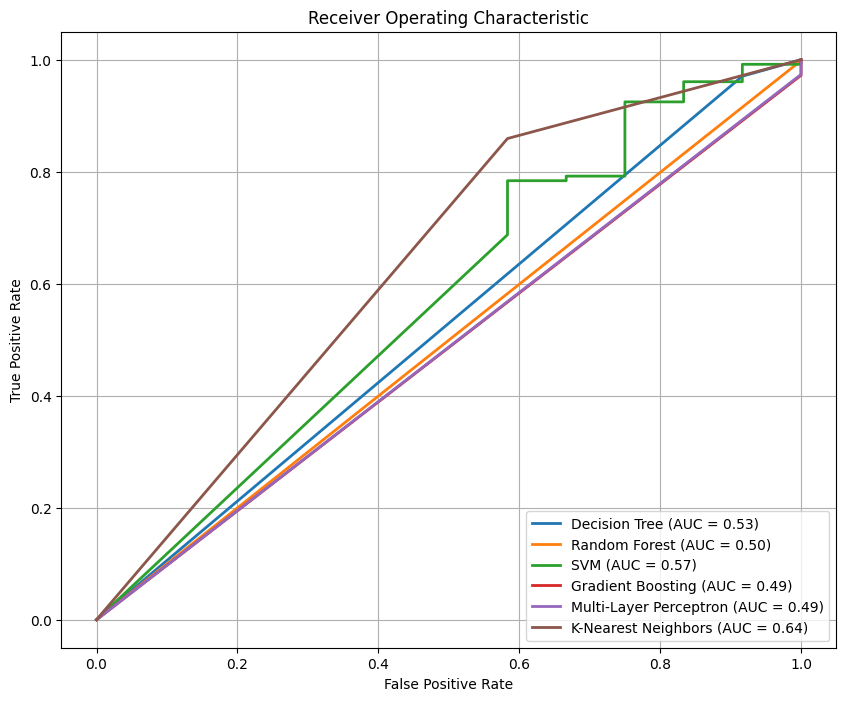

In [463]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_choco_pred,
    "Random Forest": y_random_forest_choco_pred,
    "SVM": y_svm_choco_pred,
    "Gradient Boosting": y_gb_choco_pred,
    "Multi-Layer Perceptron": y_mlp_choco_pred,
    "K-Nearest Neighbors": y_knn_choco_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = choco_svm.predict_proba(X_choco_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_choco_test, y_pred_proba)
    roc_auc = roc_auc_score(y_choco_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Resampling Chocolates Dataset via Tomek Links and SMOTE

In [464]:
X_choco_train, X_choco_test, y_choco_train, y_choco_test = train_test_split(
    user_data, choc_binary, test_size=0.33, random_state=42, stratify=choc_binary
)


tomek_links = TomekLinks(sampling_strategy='majority', n_jobs=-1)
X_resampled, y_resampled = tomek_links.fit_resample(X_choco_train, y_choco_train)

sm = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X_resampled, y_resampled)


X_choco_train, y_choco_train = X_res, y_res

## Model Training and Fitting for Combined Resampling Chocolate Dataset



DecisionTreeClassifier - Precision: 0.9830508474576272, Recall: 0.9492635024549918


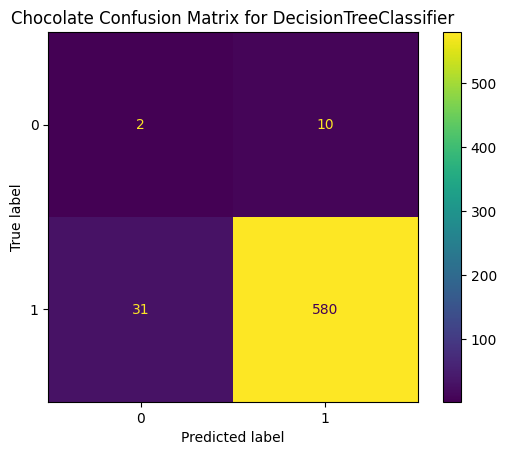

RandomForestClassifier - Precision: 0.9807073954983923, Recall: 0.9983633387888707


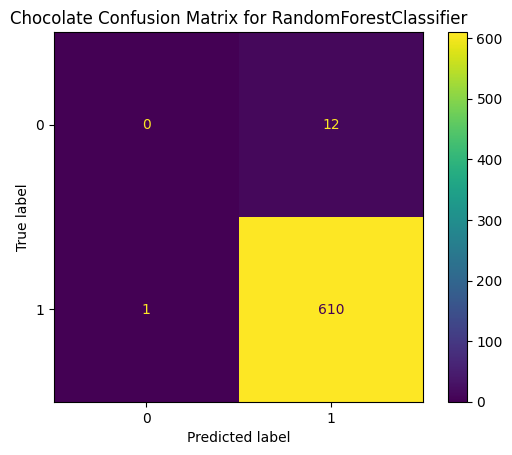

SVC - Precision: 0.9831081081081081, Recall: 0.9525368248772504


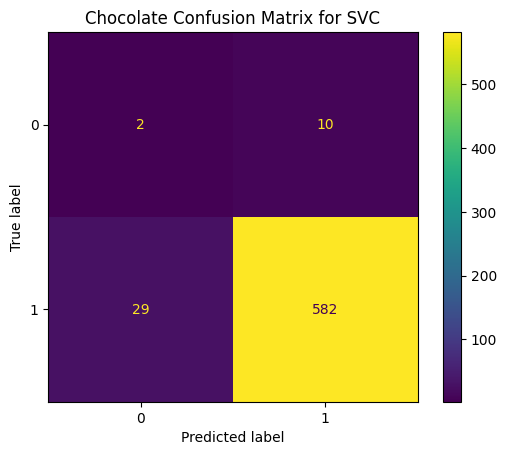

GradientBoostingClassifier - Precision: 0.9801324503311258, Recall: 0.9689034369885434


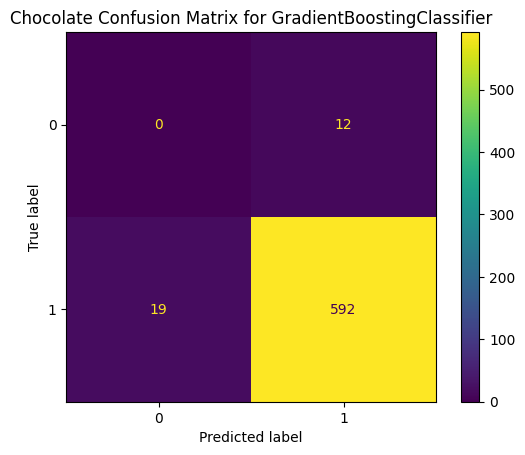

MLPClassifier - Precision: 0.9802306425041186, Recall: 0.9738134206219312


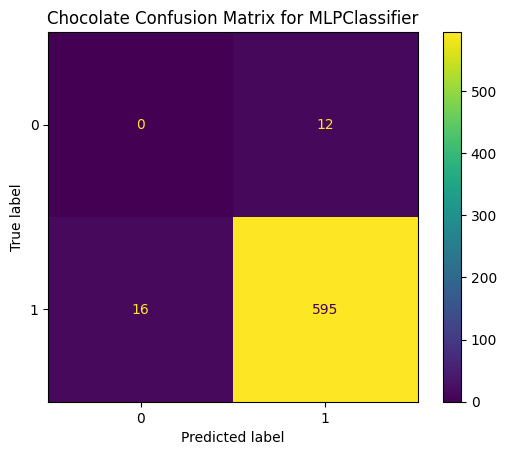

KNeighborsClassifier - Precision: 0.9867924528301887, Recall: 0.855973813420622


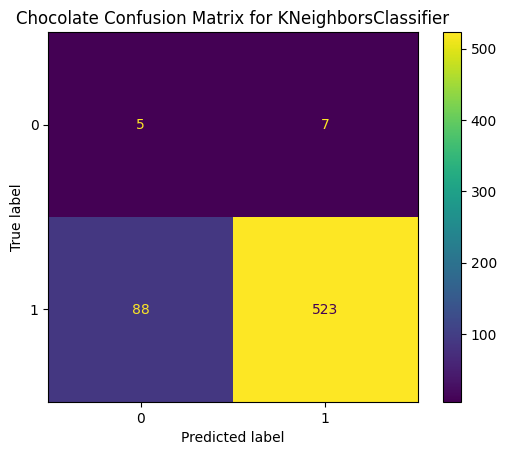

In [465]:
# Single Decision Tree
choco_tree = tree.DecisionTreeClassifier(random_state=42)
y_tree_choco_pred = evaluate_model("Chocolate", choco_tree, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Random Forest Learner
choco_random_forest = RandomForestClassifier(random_state=42)
y_random_forest_choco_pred = evaluate_model("Chocolate", choco_random_forest, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# SVM (Support Vector Machine)
choco_svm = svm.SVC(random_state=42, probability=True)
y_svm_choco_pred = evaluate_model("Chocolate", choco_svm, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Gradient Boosting Ensemble
choco_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_gb_choco_pred = evaluate_model("Chocolate", choco_gb, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# Multi-Layer Perceptron
choco_mlp = MLPClassifier(random_state=1, max_iter=500)
y_mlp_choco_pred = evaluate_model("Chocolate", choco_mlp, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


# K-Nearest Neighbors
choco_knn = KNeighborsClassifier(n_neighbors=3)
y_knn_choco_pred = evaluate_model("Chocolate", choco_knn, X_choco_train, y_choco_train, X_choco_test, y_choco_test)


## ROC Curves for Combined Sampling Chocolate

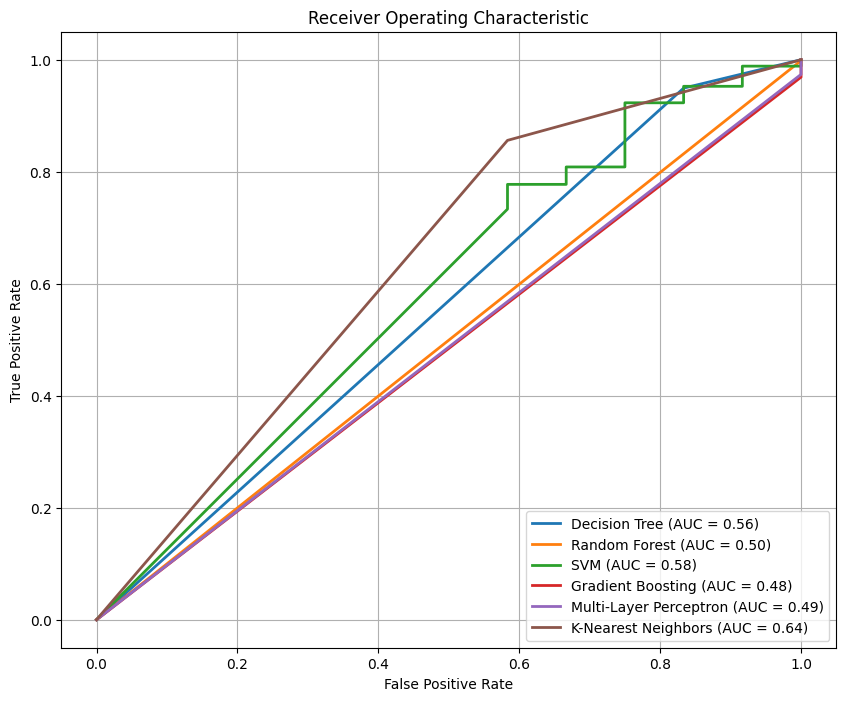

In [466]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_choco_pred,
    "Random Forest": y_random_forest_choco_pred,
    "SVM": y_svm_choco_pred,
    "Gradient Boosting": y_gb_choco_pred,
    "Multi-Layer Perceptron": y_mlp_choco_pred,
    "K-Nearest Neighbors": y_knn_choco_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = choco_svm.predict_proba(X_choco_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_choco_test, y_pred_proba)
    roc_auc = roc_auc_score(y_choco_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Class Balancing for Mushrooms

### Undersampling Mushrooms Dataset via Tomek Links

In [467]:
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(user_data, mushrooms_binary, test_size=0.33, random_state=42, stratify=mushrooms_binary)

tl = TomekLinks(sampling_strategy='majority', n_jobs=-1)
X_res, y_res = tl.fit_resample(X_mushroom_train, y_mushroom_train)

X_mushroom_train, y_mushroom_train = X_res, y_res
print("Original class distribution:", pd.Series(mushrooms_binary).value_counts())
print("Resampled class distribution:", pd.Series(y_res).value_counts())


Original class distribution: 0    1191
1     694
Name: count, dtype: int64
Resampled class distribution: 0    718
1    465
Name: count, dtype: int64


## Model Training and Fitting for Undersampled Mushroom Dataset



DecisionTreeClassifier - Precision: 0.5498154981549815, Recall: 0.6506550218340611


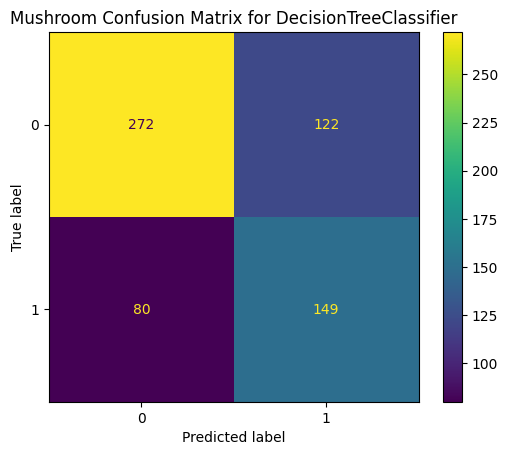

RandomForestClassifier - Precision: 0.6334661354581673, Recall: 0.6943231441048034


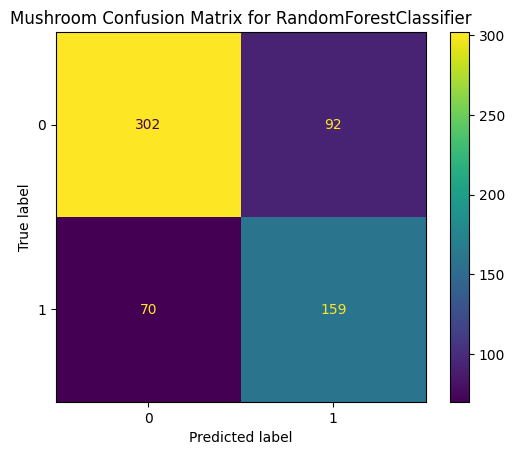

SVC - Precision: 0.6388888888888888, Recall: 0.7030567685589519


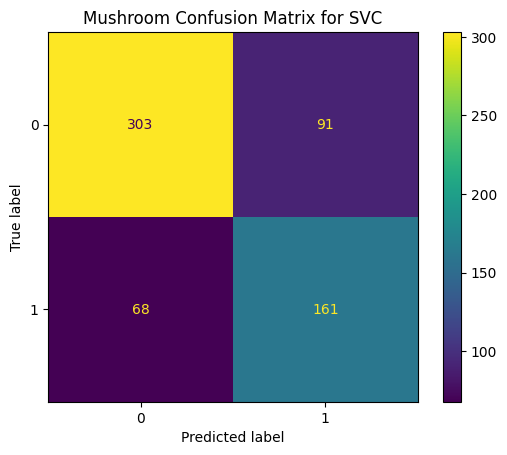

GradientBoostingClassifier - Precision: 0.6245210727969349, Recall: 0.7117903930131004


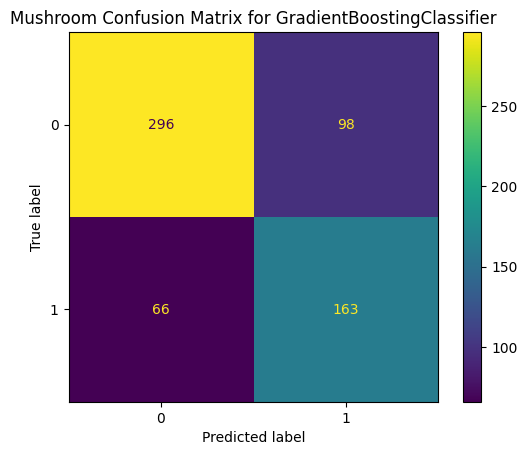

MLPClassifier - Precision: 0.5931558935361216, Recall: 0.6812227074235808


/Users/jhaha/Documents/GitHub/Drug-Use-Prediction/sklearn-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


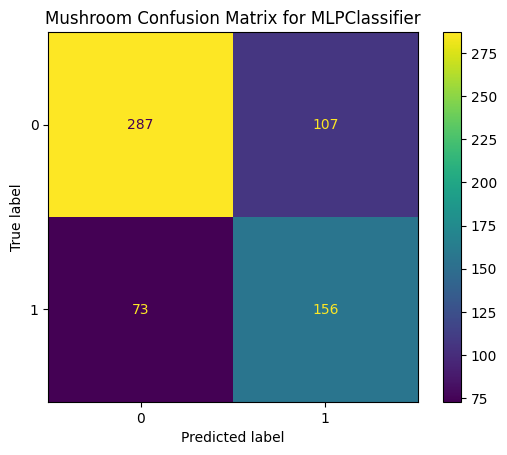

KNeighborsClassifier - Precision: 0.6031746031746031, Recall: 0.6637554585152838


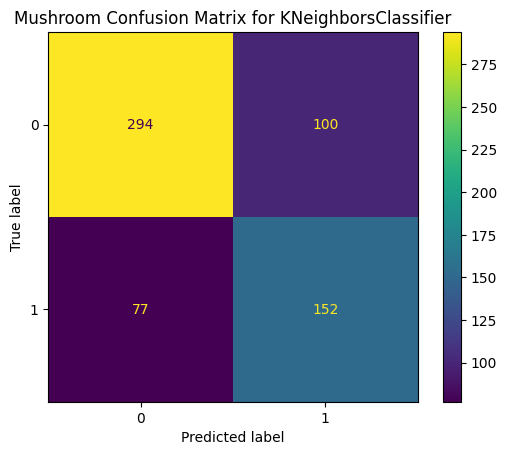

In [468]:
# Single Decision Tree
mushroom_tree = tree.DecisionTreeClassifier(random_state=42)
y_tree_mushroom_pred = evaluate_model("Mushroom", mushroom_tree, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Random Forest Learner
mushroom_random_forest = RandomForestClassifier(random_state=42)
y_random_forest_mushroom_pred = evaluate_model("Mushroom", mushroom_random_forest, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# SVM (Support Vector Machine)
mushroom_svm = svm.SVC(random_state=42, probability=True)
y_svm_mushroom_pred = evaluate_model("Mushroom", mushroom_svm, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Gradient Boosting Ensemble
mushroom_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_gb_mushroom_pred = evaluate_model("Mushroom", mushroom_gb, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Multi-Layer Perceptron
mushroom_mlp = MLPClassifier(random_state=1, max_iter=500)
y_mlp_mushroom_pred = evaluate_model("Mushroom", mushroom_mlp, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# K-Nearest Neighbors
mushroom_knn = KNeighborsClassifier(n_neighbors=3)
y_knn_mushroom_pred = evaluate_model("Mushroom", mushroom_knn, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

## ROC Curves for Undersampled Mushrooms

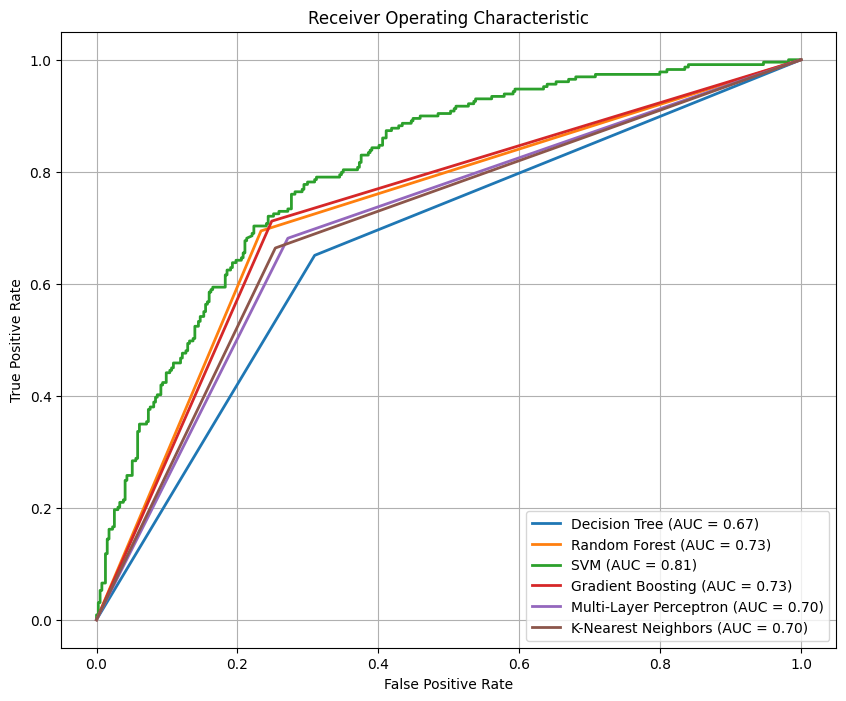

In [469]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_mushroom_pred,
    "Random Forest": y_random_forest_mushroom_pred,
    "SVM": y_svm_mushroom_pred,
    "Gradient Boosting": y_gb_mushroom_pred,
    "Multi-Layer Perceptron": y_mlp_mushroom_pred,
    "K-Nearest Neighbors": y_knn_mushroom_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = mushroom_svm.predict_proba(X_mushroom_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_mushroom_test, y_pred_proba)
    roc_auc = roc_auc_score(y_mushroom_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Oversampling Mushrooms Dataset via SMOTE

In [470]:
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(user_data, mushrooms_binary, test_size=0.33, random_state=42, stratify=mushrooms_binary)

sm = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X_mushroom_train, y_mushroom_train)

X_mushroom_train, y_mushroom_train = X_res, y_res
print('Original dataset shape %s' % pd.Series(mushrooms_binary).value_counts())
print('Original dataset shape %s' % pd.Series(y_res).value_counts())

Original dataset shape 0    1191
1     694
Name: count, dtype: int64
Original dataset shape 0    797
1    797
Name: count, dtype: int64


## Model Training and Fitting for Oversampled Mushrooms Dataset



DecisionTreeClassifier - Precision: 0.5760869565217391, Recall: 0.6943231441048034


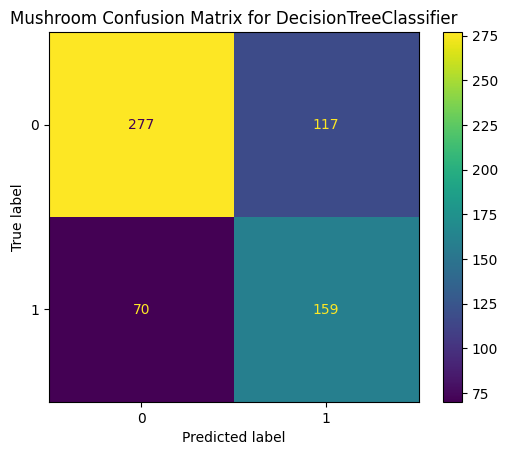

RandomForestClassifier - Precision: 0.6324110671936759, Recall: 0.6986899563318777


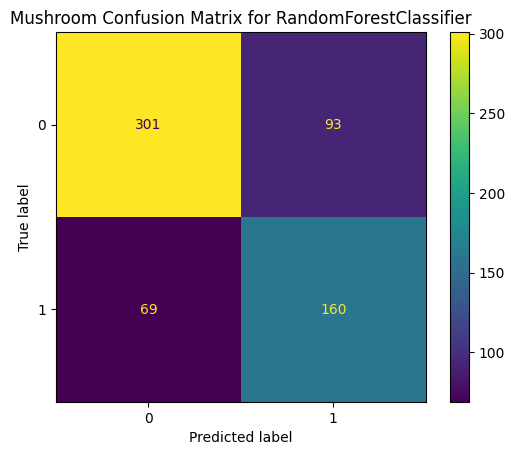

SVC - Precision: 0.6097560975609756, Recall: 0.7641921397379913


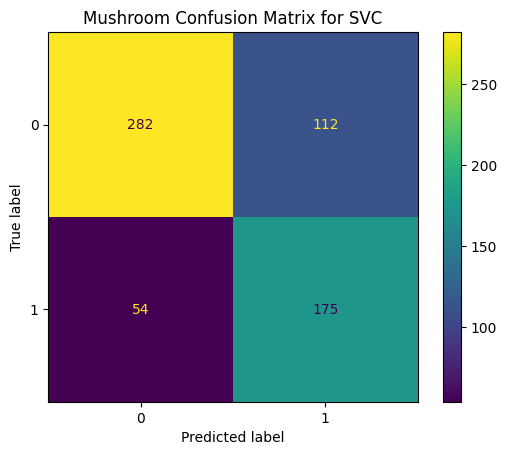

GradientBoostingClassifier - Precision: 0.6102941176470589, Recall: 0.7248908296943232


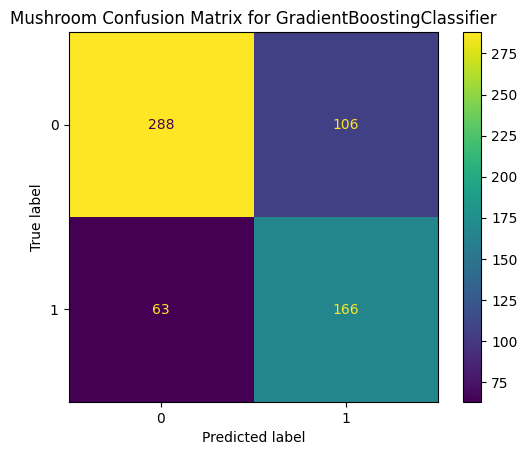

MLPClassifier - Precision: 0.5932835820895522, Recall: 0.6943231441048034


/Users/jhaha/Documents/GitHub/Drug-Use-Prediction/sklearn-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


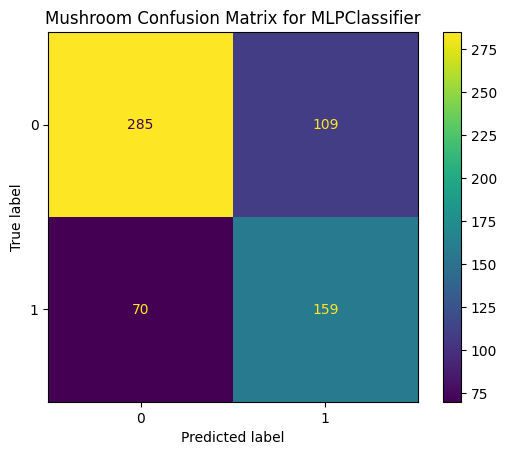

KNeighborsClassifier - Precision: 0.56, Recall: 0.7336244541484717


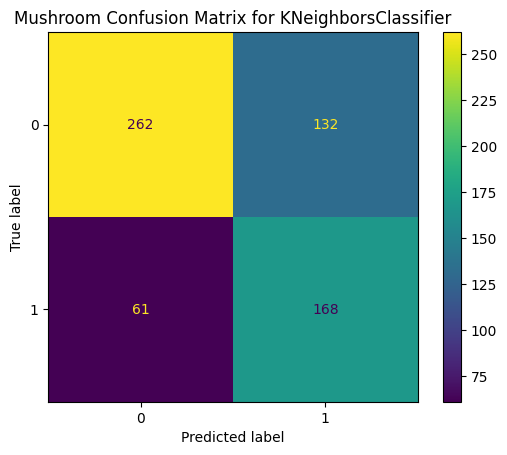

In [471]:
# Single Decision Tree
mushroom_tree = tree.DecisionTreeClassifier(random_state=42)
y_tree_mushroom_pred = evaluate_model("Mushroom", mushroom_tree, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Random Forest Learner
mushroom_random_forest = RandomForestClassifier(random_state=42)
y_random_forest_mushroom_pred = evaluate_model("Mushroom", mushroom_random_forest, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# SVM (Support Vector Machine)
mushroom_svm = svm.SVC(random_state=42, probability=True)
y_svm_mushroom_pred = evaluate_model("Mushroom", mushroom_svm, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Gradient Boosting Ensemble
mushroom_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_gb_mushroom_pred = evaluate_model("Mushroom", mushroom_gb, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Multi-Layer Perceptron
mushroom_mlp = MLPClassifier(random_state=1, max_iter=500)
y_mlp_mushroom_pred = evaluate_model("Mushroom", mushroom_mlp, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# K-Nearest Neighbors
mushroom_knn = KNeighborsClassifier(n_neighbors=3)
y_knn_mushroom_pred = evaluate_model("Mushroom", mushroom_knn, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

## ROC Curves for Oversampled Mushrooms

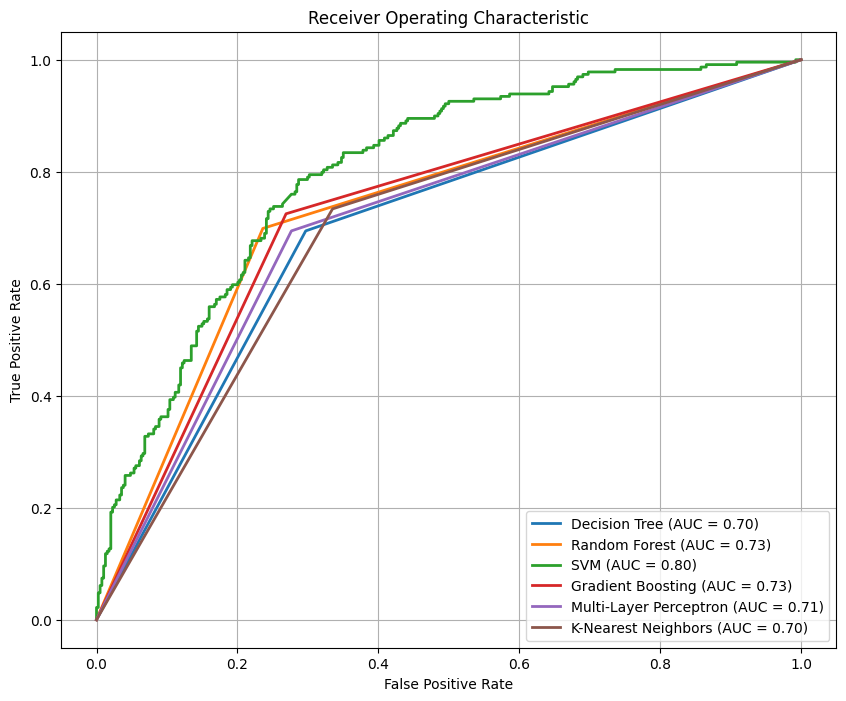

In [472]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_mushroom_pred,
    "Random Forest": y_random_forest_mushroom_pred,
    "SVM": y_svm_mushroom_pred,
    "Gradient Boosting": y_gb_mushroom_pred,
    "Multi-Layer Perceptron": y_mlp_mushroom_pred,
    "K-Nearest Neighbors": y_knn_mushroom_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = mushroom_svm.predict_proba(X_mushroom_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_mushroom_test, y_pred_proba)
    roc_auc = roc_auc_score(y_mushroom_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Resampling Mushrooms Dataset via Tomek Links and SMOTE

In [473]:
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(user_data, mushrooms_binary, test_size=0.33, random_state=42, stratify=mushrooms_binary)

tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_mushroom_train, y_mushroom_train)

sm = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=42)
X_res, y_res = sm.fit_resample(X_resampled, y_resampled)

X_mushroom_train, y_mushroom_train =  X_res, y_res

## Model Training and Fitting for Combined Resampling Mushroom Dataset



DecisionTreeClassifier - Precision: 0.5577689243027888, Recall: 0.611353711790393


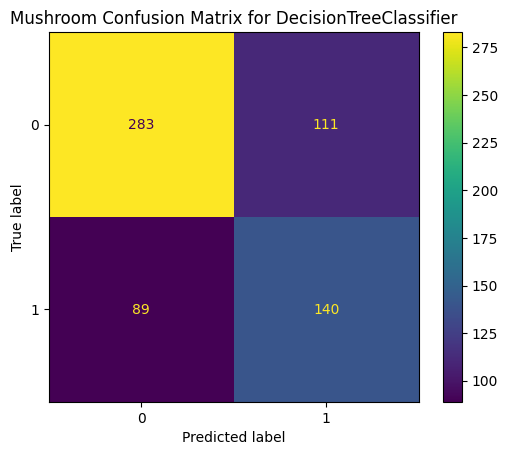

RandomForestClassifier - Precision: 0.6212121212121212, Recall: 0.7161572052401747


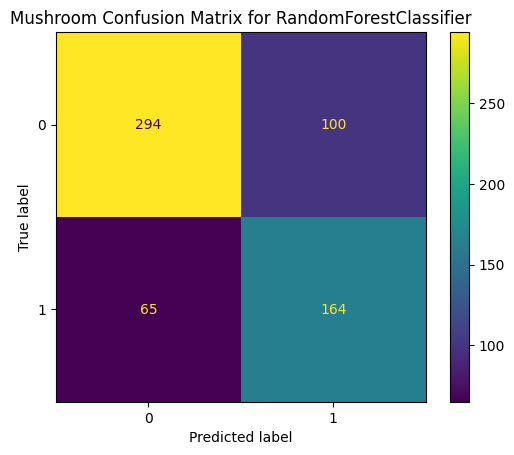

SVC - Precision: 0.6040955631399317, Recall: 0.7729257641921398


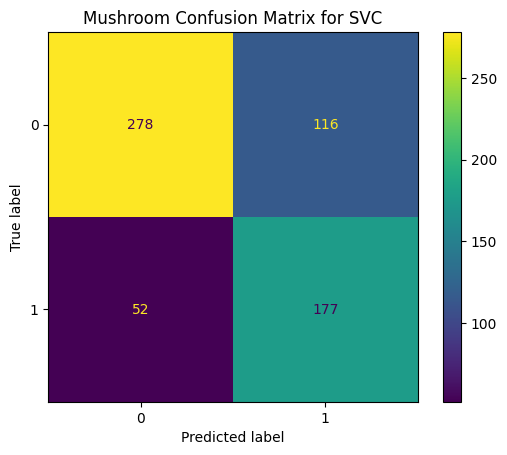

GradientBoostingClassifier - Precision: 0.5971731448763251, Recall: 0.7379912663755459


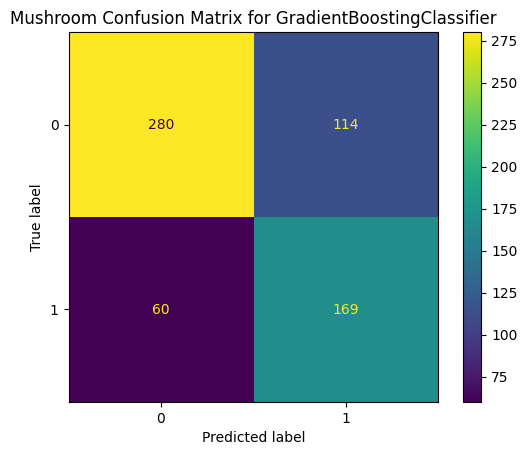

MLPClassifier - Precision: 0.5929824561403508, Recall: 0.7379912663755459


/Users/jhaha/Documents/GitHub/Drug-Use-Prediction/sklearn-env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


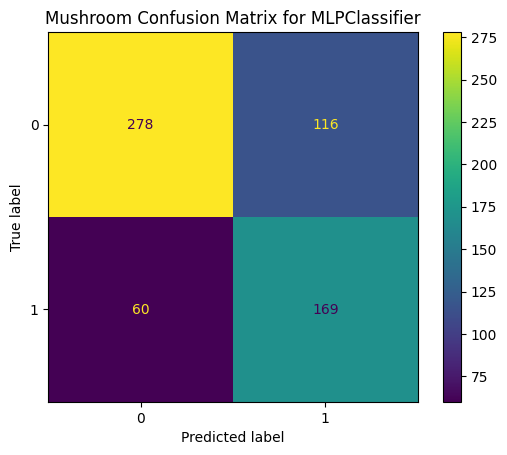

KNeighborsClassifier - Precision: 0.5667752442996743, Recall: 0.759825327510917


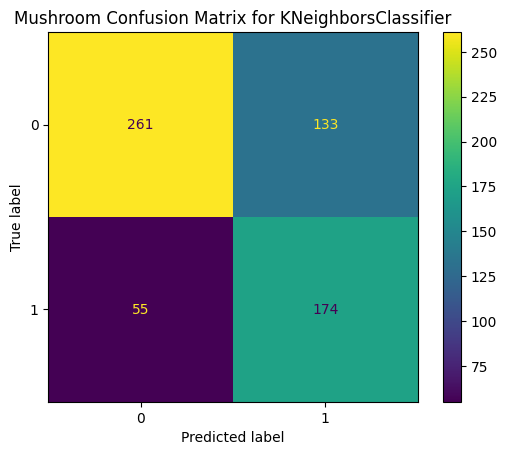

In [474]:
# Single Decision Tree
mushroom_tree = tree.DecisionTreeClassifier(random_state=42)
y_tree_mushroom_pred = evaluate_model("Mushroom", mushroom_tree, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Random Forest Learner
mushroom_random_forest = RandomForestClassifier(random_state=42)
y_random_forest_mushroom_pred = evaluate_model("Mushroom", mushroom_random_forest, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# SVM (Support Vector Machine)
mushroom_svm = svm.SVC(random_state=42, probability=True)
y_svm_mushroom_pred = evaluate_model("Mushroom", mushroom_svm, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Gradient Boosting Ensemble
mushroom_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
y_gb_mushroom_pred = evaluate_model("Mushroom", mushroom_gb, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# Multi-Layer Perceptron
mushroom_mlp = MLPClassifier(random_state=1, max_iter=500)
y_mlp_mushroom_pred = evaluate_model("Mushroom", mushroom_mlp, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

# K-Nearest Neighbors
mushroom_knn = KNeighborsClassifier(n_neighbors=3)
y_knn_mushroom_pred = evaluate_model("Mushroom", mushroom_knn, X_mushroom_train, y_mushroom_train, X_mushroom_test, y_mushroom_test)

## ROC Curves for Combined Sampling Mushrooms

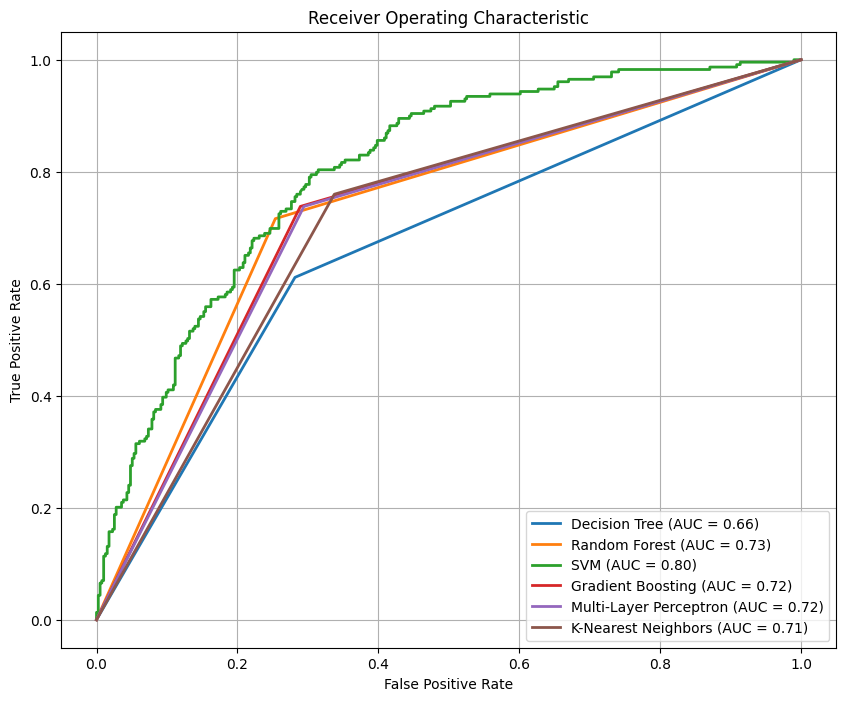

In [475]:
# Create a figure for the ROC curve
plt.figure(figsize=(10, 8))

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)

# List of classifiers and their predictions
models = {
    "Decision Tree": y_tree_mushroom_pred,
    "Random Forest": y_random_forest_mushroom_pred,
    "SVM": y_svm_mushroom_pred,
    "Gradient Boosting": y_gb_mushroom_pred,
    "Multi-Layer Perceptron": y_mlp_mushroom_pred,
    "K-Nearest Neighbors": y_knn_mushroom_pred,
}

# Loop through each model to calculate and plot ROC curves
for name, predictions in models.items():
    # Use predict_proba for SVM and others that support it
    if name == "SVM":
        y_pred_proba = mushroom_svm.predict_proba(X_mushroom_test)[:, 1]  # Use probabilities
    else:
        y_pred_proba = predictions  # For other models, use the predicted classes

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_mushroom_test, y_pred_proba)
    roc_auc = roc_auc_score(y_mushroom_test, y_pred_proba)
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

# Finalize the ROC curve plot
plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()